In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [3]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 07:15:10--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... failed: Connection timed out.
Retrying.

--2024-10-14 07:15:34--  (try: 2)  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... failed: Connection timed out.
Retrying.

--2024-10-14 07:15:57--  (try: 3)  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... failed: Connection timed out.
Retrying.

--2024-10-14 07:16:21--  (try: 4)  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... failed: Connection timed out.
Retrying.

--2024-

In [8]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

In [9]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [84]:
df.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [21]:
selectedc = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
dfn = df[selectedc]

In [23]:
dfn.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
dfn.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
dfn['education'].mode()

0    secondary
Name: education, dtype: object

In [39]:
num_cols = list(dfn.dtypes[dfn.dtypes != 'object'].index)
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [35]:
dfn[num_cols].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


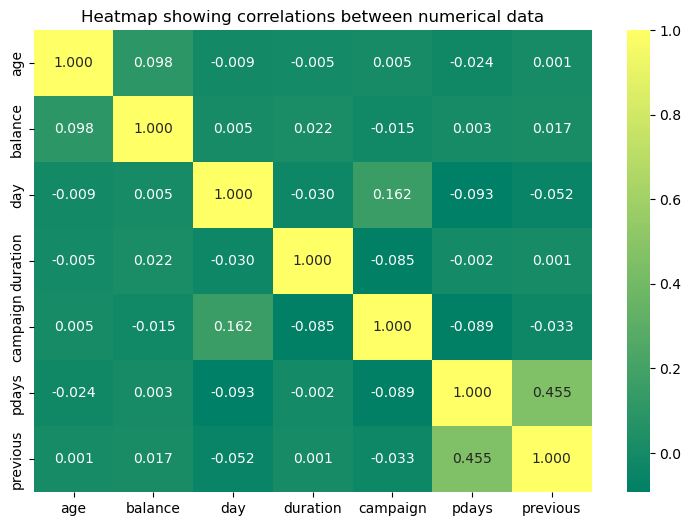

In [85]:
plt.figure(figsize=(9, 6))
sns.heatmap(dfn[num_cols].corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [44]:
dfn['y'] = (dfn['y'] == 'yes').astype('int64')

C:\Users\Excellus\AppData\Local\Temp\ipykernel_17348\1241618025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['y'] = (dfn['y'] == 'yes').astype('int64')


In [45]:
dfn.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [46]:
dfn.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
df_full_train, df_test = train_test_split(dfn, test_size=0.2, random_state=42)

In [49]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [50]:
len(df_train), len(df_test), len(df_val)

(27126, 9043, 9042)

In [52]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [53]:
y_train = df_train['y']
del df_train['y']
y_test = df_test['y']
del df_test['y']
y_val = df_val['y']
del df_val['y']

In [54]:
dfn.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [55]:
categorical = list(dfn.dtypes[dfn.dtypes == 'object'].index)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [56]:
dfn[categorical]

,job,marital,education,housing,contact,month,poutcome
0,management,married,tertiary,yes,unknown,may,unknown
1,technician,single,secondary,yes,unknown,may,unknown
2,entrepreneur,married,secondary,yes,unknown,may,unknown
3,blue-collar,married,unknown,yes,unknown,may,unknown
4,unknown,single,unknown,no,unknown,may,unknown
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,cellular,nov,unknown
45207,retired,divorced,primary,no,cellular,nov,unknown
45208,retired,married,secondary,no,cellular,nov,success
45209,blue-collar,married,secondary,no,telephone,nov,unknown


In [57]:
from sklearn.metrics import mutual_info_score

In [63]:
def mutual_info_average(series):
    return round(mutual_info_score(series, df_full_train['y']), 2)

In [64]:
df_full_train[categorical].apply(mutual_info_average)

job          0.01
marital      0.00
education    0.00
housing      0.01
contact      0.01
month        0.02
poutcome     0.03
dtype: float64

In [65]:
from sklearn.feature_extraction import DictVectorizer

In [66]:
dv = DictVectorizer(sparse=False) 

In [68]:
train_dict = df_train.to_dict(orient= 'records')
train_dict[:1]

[{'age': 32,
  'job': 'technician',
  'marital': 'single',
  'education': 'tertiary',
  'balance': 1100,
  'housing': 'yes',
  'contact': 'cellular',
  'day': 11,
  'month': 'aug',
  'duration': 67,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 38,
  'job': 'entrepreneur',
  'marital': 'married',
  'education': 'secondary',
  'balance': 0,
  'housing': 'yes',
  'contact': 'cellular',
  'day': 17,
  'month': 'nov',
  'duration': 258,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 49,
  'job': 'blue-collar',
  'marital': 'married',
  'education': 'secondary',
  'balance': 3309,
  'housing': 'yes',
  'contact': 'cellular',
  'day': 15,
  'month': 'may',
  'duration': 349,
  'campaign': 2,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 37,
  'job': 'housemaid',
  'marital': 'married',
  'education': 'primary',
  'balance': 2410,
  'housing': 'no',
  'contact': 'cellular',
  'day': 4,
  'month': '

In [70]:
X_train = dv.fit_transform(train_dict)
X_train[:1]

array([[ 3.2e+01,  1.1e+03,  1.0e+00,  1.0e+00,  0.0e+00,  0.0e+00,
         1.1e+01,  6.7e+01,  0.0e+00,  0.0e+00,  1.0e+00,  0.0e+00,
         0.0e+00,  1.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  1.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  1.0e+00,  0.0e+00,
         1.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, -1.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  1.0e+00,  0.0e+00]])

In [71]:
val_dict = df_val.to_dict(orient= 'records')
X_val = dv.transform(val_dict)
test_dict = df_test.to_dict(orient= 'records')
X_test = dv.transform(test_dict)

In [72]:
X_test[:1]

array([[ 40., 580.,   1.,   0.,   0.,   1.,  16., 192.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  -1.,   0.,   0.,
          0.,   1.,   0.]])

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [75]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [76]:
model.intercept_[0]

-0.9426328016047085

In [78]:
model.coef_[0][:10]

array([-2.25820964e-03,  1.11954533e-05, -8.00985652e-02,  2.81360717e-01,
        7.34741202e-02, -1.29746764e+00,  7.17730063e-03,  4.12878817e-03,
       -4.33928280e-01, -2.40559786e-01])

In [79]:
preed = model.predict(X_train)

In [80]:
probX = model.predict_proba(X_train)
probX[:, 1]

In [83]:
predv = model.predict(X_val)
# val_acc = (predv == y_val).mean()
val_acc = round(val_acc, 2)
val_acc

0.9

In [ ]:
accuracy = np.round(accuracy_score(y_val, predv),2)
print(f'Accuracy = {accuracy}')

In [48]:
features = df_train.columns.to_list()
features

In [49]:
scores = {}
for feature in features:
    df_trainf = df_train.drop(columns=[feature])
    df_testf = df_test.drop(columns=[feature])
    df_valf = df_val.drop(columns=[feature])
    
    trainf_dict = df_trainf.to_dict(orient= 'records')
    X_trainf = dv.fit_transform(trainf_dict)
    val_dictf = df_valf.to_dict(orient= 'records')
    X_valf = dv.transform(val_dictf)
    test_dictf = df_testf.to_dict(orient= 'records')
    X_testf = dv.transform(test_dictf)
    
    model.fit(X_trainf, y_train)
    preedf = model.predict(X_valf)
    
    scores[feature] = (preedf == y_val).mean()
print(scores)

{'year': 0.9471254720939991, 'engine_hp': 1.0, 'transmission_type': 0.9995803608896349, 'city_mpg': 0.9995803608896349}


In [ ]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [ ]:
scores

In [ ]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

In [ ]:
data['price'] = np.log1p(data['price'])

In [ ]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [ ]:
df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

In [ ]:
y_train.shape, y_val.shape

In [ ]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

In [ ]:
scores

In [ ]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')